In [1]:
# Import relavant libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

In [2]:
filename = 'tss.csv'
df = pd.read_csv(filename)
df.head() 

,Sample,Initial,Final
0,1,1.3395,1.3656
1,2,1.0771,1.0791
2,3,1.0826,1.0849
3,4,1.0933,1.0962
4,5,1.0848,1.0866


In [3]:
filename = 'Filter_Map.csv'
fmap = pd.read_csv(filename)
fmap.head() 

,Sample,Volume,Description,Tube,Position
0,25,24.0,Initial Rinse,6,--
1,20,22.0,Initial Rinse,7,--
2,11,25.0,Initial Rinse,8,--
3,17,21.5,Initial Rinse,9,--
4,10,21.0,Initial Rinse,10,--


In [4]:
df2=pd.merge(df,fmap,how='left', on='Sample')

In [5]:
df2.head()

,Sample,Initial,Final,Volume,Description,Tube,Position
0,1,1.3395,1.3656,53.0,Final Rinse,9,--
1,2,1.0771,1.0791,150.0,Whole Sample,8,Top
2,3,1.0826,1.0849,150.0,Whole Sample,9,Top
3,4,1.0933,1.0962,152.0,Whole Sample,6,Bottom
4,5,1.0848,1.0866,150.0,Initial Sample,10,Bottom


In [6]:
df2['Conc']=(df2['Final']-df2['Initial'])/df2['Volume']

In [26]:
#Set up definitions to extract difference between top and bottom
def des(dd,description):
    df_type=dd[dd['Description']==description]
    return df_type;  
def tube(dd,description,number):
    df_type=des(dd,description)
    exp_u=df_type[df_type['Tube']==number]
    return exp_u;
def diff(dd,description,number):
    exp_u=tube(dd,description,number)
    top=exp_u[exp_u['Position']=='Top']
    bottom=exp_u[exp_u['Position']=='Bottom']
    red=bottom.iloc[0].Conc-top.iloc[0].Conc
    per=red/bottom.iloc[0].Conc
    return per 
   

In [27]:
w3=diff(df2,'Whole Sample',9)
print(w3)

-0.27777777777774354


In [28]:
df_filt=pd.DataFrame({'Tube': [6,7,8,9,10]})

In [29]:
def chart(dd,Description):
    df_filt[Description]=[diff(df2,Description, 6),diff(df2,Description, 7),diff(df2,Description, 8),diff(df2,Description, 9),diff(df2,Description, 10),]
    return df_filt

In [30]:
xs=chart(df2,'Whole Sample')

In [31]:
xs=chart(df2,'Initial Sample')

In [32]:
xs

,Tube,Whole Sample,Initial Sample
0,6,0.275862,0.200000
1,7,-0.455215,0.295302
2,8,-0.250000,-0.262174
3,9,-0.277778,0.087518
4,10,0.051776,0.013158


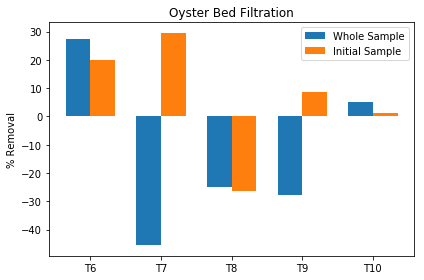

In [34]:
labels = ['T6', 'T7', 'T8', 'T9', 'T10']
whole = xs['Whole Sample']*100
initial = xs['Initial Sample']*100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, whole, width, label='Whole Sample')
rects2 = ax.bar(x + width/2, initial, width, label='Initial Sample')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Removal')
ax.set_title('Oyster Bed Filtration')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig('filtration.png')

## Analyze Pressure

In [35]:
filename = 'pressure.csv'
df3 = pd.read_csv(filename)
df3.head() 

,Time,6p,6bh,7p,7bh,8p,8bh,9p,9bh,10p,10bh
0,0,35,280,40,273,42,280,NaN,NaN,NaN,NaN
1,23,40,280,42,275,44,279,44.0,265.0,40.0,285.0
2,57,49,283,44,273,46,283,49.0,270.0,44.0,295.0
3,86,48,283,39,265,45,284,47.0,275.0,49.0,282.0
4,135,49,275,42,273,48,280,40.0,270.0,47.0,293.0


In [ ]:
plt.scatter()